In [1]:
import os
os.chdir("../../")

In [2]:
import scanpy as sc
import seaborn as sns
import scnet as sn
import pandas as pd
import matplotlib.pyplot as plt

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
sc.settings.figdir = "./results/Figure_2/UMAPs/"

In [4]:
sc.set_figure_params(dpi=100, frameon=False)

In [5]:
results_df = pd.DataFrame(columns=["model", "type", "value"])
results_df

,model,type,value


## Pre-trained UMAP

In [ ]:
latent_adata = sc.read(f"./results/Figure_2/latent_pretrain.h5ad")

In [ ]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

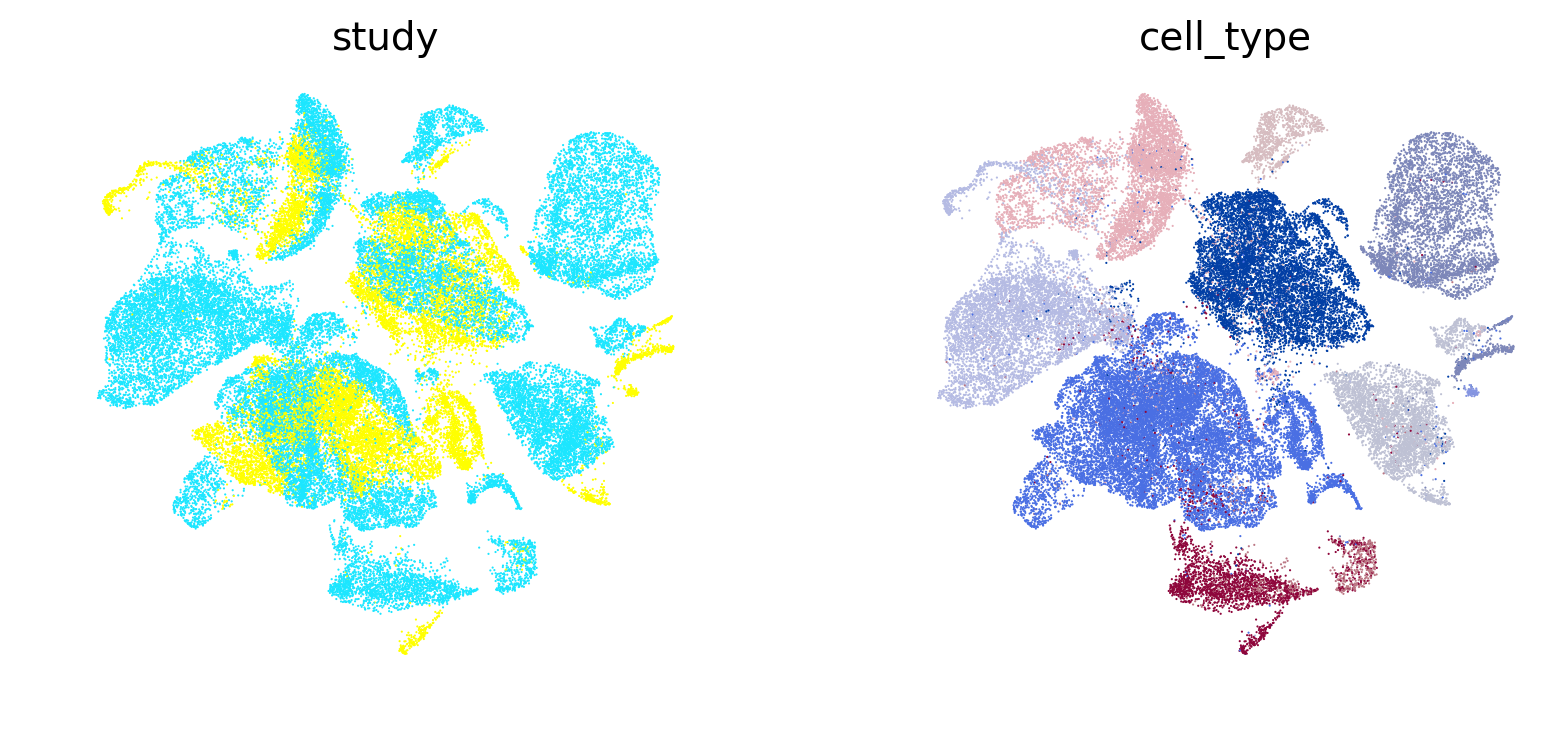

In [11]:
sc.pl.umap(latent_adata, color=['cell_type'], title="", legend_loc=None, show=False,
               palette=sc.pl.palettes.zeileis_28, save=f'_pretrained_cell_type.pdf')
sc.pl.umap(latent_adata, color=['study'], title="", legend_loc=None, show=False,
           palette=sc.pl.palettes.godsnot_102, save=f'_pretrained_condition.pdf')
sc.pl.umap(latent_adata, color=['study', 'cell_type'], legend_loc=None, show=True)

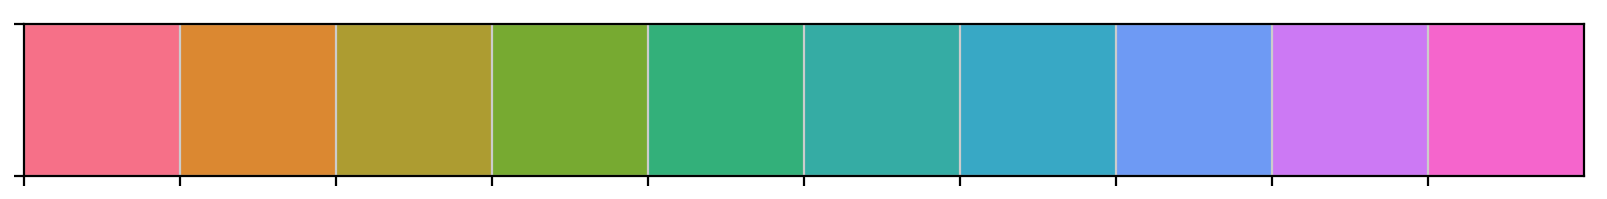

In [6]:
import seaborn as sns
sns.palplot(sns.color_palette('husl', 10))

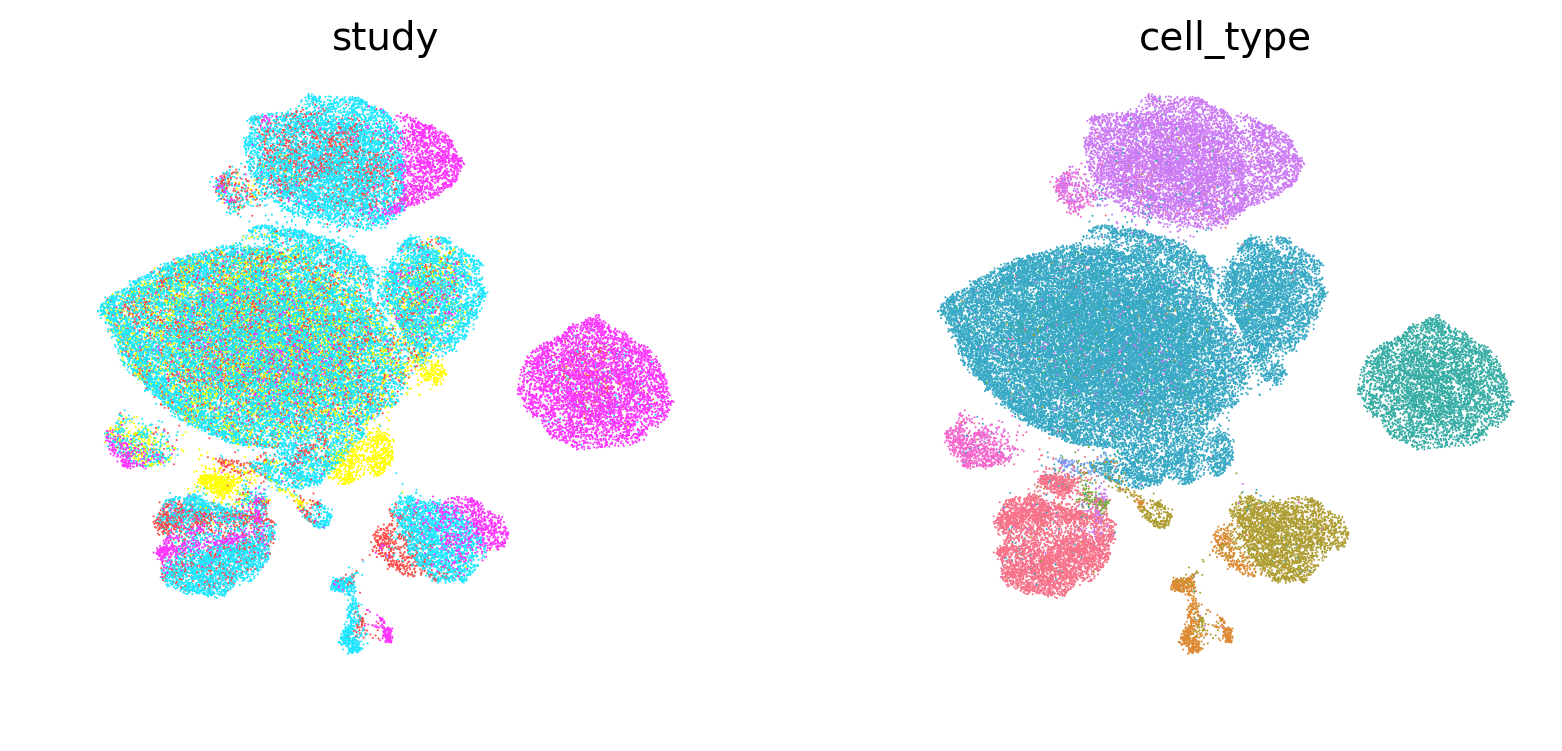

scNet


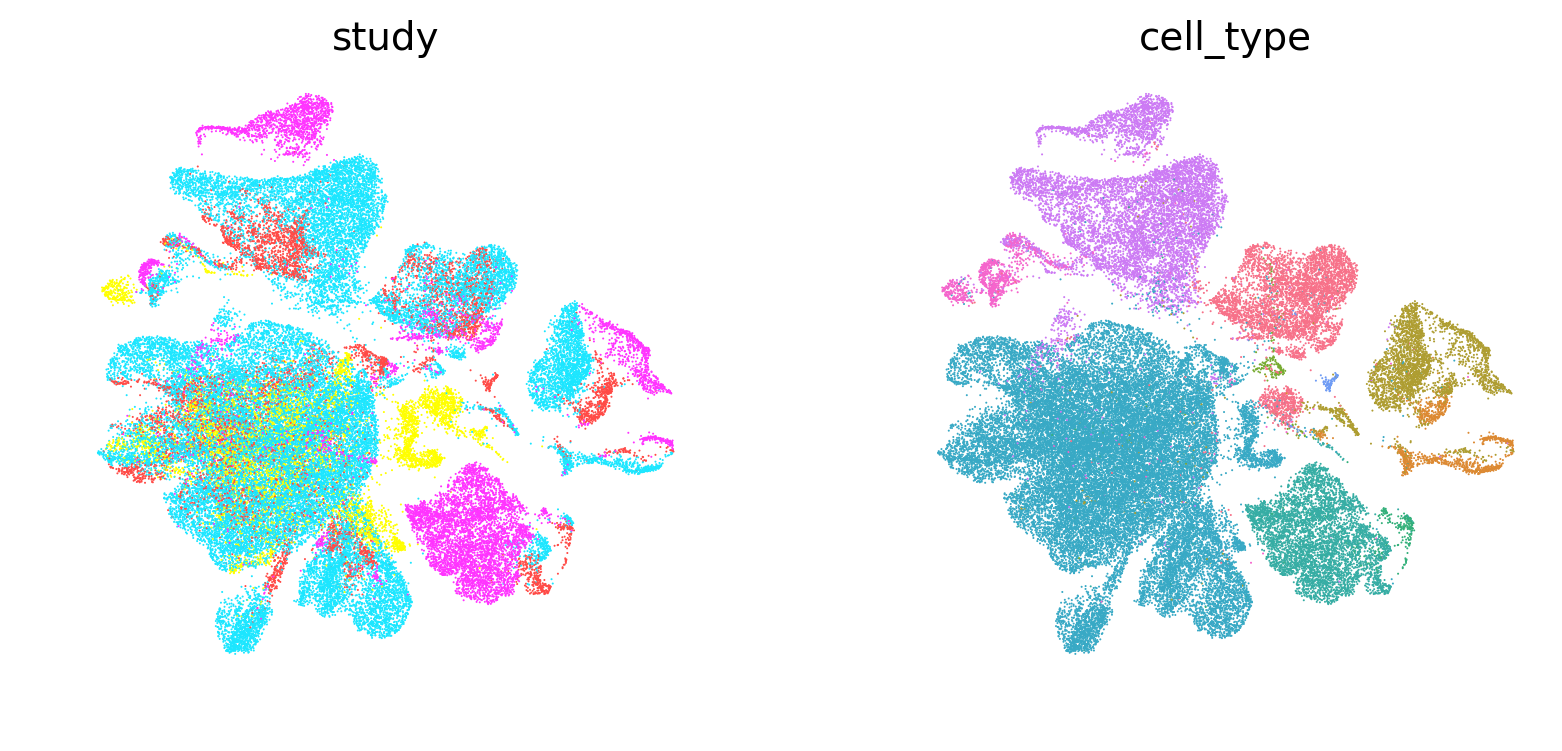

scNet_v1


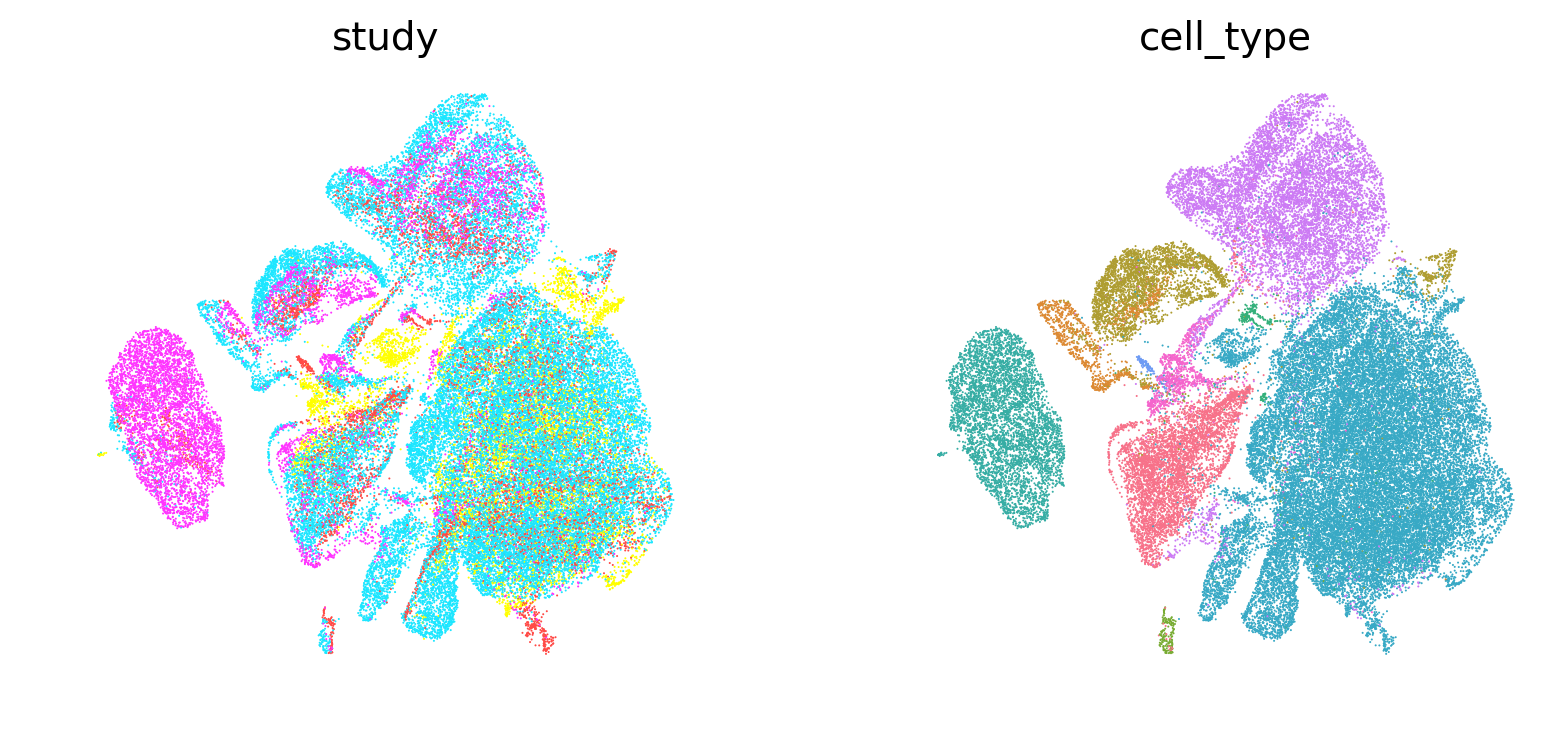

scNet_v2


In [11]:
for model in ['scNet', 'scNet_v1', 'scNet_v2']:
    latent_adata = sc.read(f"./results/Figure_2/latent_{model}_all.h5ad")
    latent_adata.obs['study'].replace("Saunders", "Saunders (reference)", inplace=True)
    latent_adata.obs['study'].replace("Tabula_muris", "Tabula_muris (query)", inplace=True)
    latent_adata.obs['study'].replace("Zeisel", "Zeisel (query)", inplace=True)
    latent_adata.obs['study'].replace("Rosenberg", "Rosenberg (reference)", inplace=True)
    
    condition_palette = sc.pl.palettes.godsnot_102
    cell_type_palette = sns.color_palette('husl', 10)
    sc.pl.umap(latent_adata, color=['cell_type'], title="", legend_loc=None, show=False,
               palette=cell_type_palette, save=f'_{model}_cell_type.pdf')
    sc.pl.umap(latent_adata, color=['study'], title="", legend_loc=None, show=False,
               palette=condition_palette, save=f'_{model}_condition.pdf')
    
    sc.pl.umap(latent_adata, color=['study', 'cell_type'], legend_loc=None, show=True)
    print(model)
    ebm = sn.metrics.entropy_batch_mixing(latent_adata, 'study')
    knn = sn.metrics.knn_purity(latent_adata, 'cell_type')
    results_df = results_df.append({"model": model, "type": 'KNN_Purity', "value": knn}, ignore_index=True)
    results_df = results_df.append({"model": model, "type": 'EBM', "value": ebm}, ignore_index=True)

In [31]:
results_df

,model,type,value
0,scNet,KNN_Purity,0.766430
1,scNet,EBM,0.441027
2,scNet_v1,KNN_Purity,0.864924
3,scNet_v1,EBM,0.250626
4,scNet_v2,KNN_Purity,0.875536
5,scNet_v2,EBM,0.364416


In [37]:
results_df.to_csv("./results/Figure_2/metrics.csv", index=None)